In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
input_shape = (299, 299)

In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
!tar -xvf /content/lfw-deepfunneled.tgz

Streaming output truncated to the last 5000 lines.
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0012.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0013.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0014.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0015.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0016.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0017.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0018.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0019.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0020.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0021.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg
lfw-deepfunne

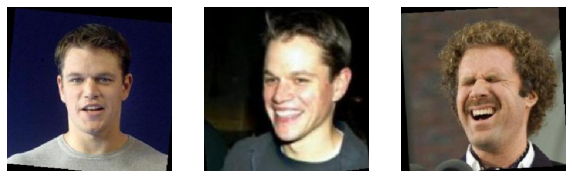

In [ ]:
matt_1 = image.load_img("lfw-deepfunneled/Matt_Damon/Matt_Damon_0001.jpg", target_size=input_shape)
matt_2 = image.load_img("lfw-deepfunneled/Matt_Damon/Matt_Damon_0002.jpg", target_size=input_shape)
will_1 = image.load_img("lfw-deepfunneled/Will_Ferrell/Will_Ferrell_0001.jpg", target_size=input_shape)

loaded_imgs = [matt_1, matt_2, will_1]

plt.figure(figsize=(10, 10))
for i, img in enumerate(loaded_imgs):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(np.asarray(img).astype("uint8"))
    plt.axis("off")

In [ ]:
model = InceptionV3(
    input_shape=input_shape + (3,),
    weights='imagenet',
    include_top=False,
    pooling='avg',
)


87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
x = np.array([image.img_to_array(img) for img in loaded_imgs])
x = preprocess_input(x)
features = model.predict(x)


In [ ]:
features.shape

(3, 2048)

In [ ]:
print(cosine_similarity(features[0].reshape(1, -1), features[1:]))

[[0.7362071  0.65814054]]


In [ ]:
!wget https://www.anred.org/wp-content/uploads/2021/11/trueno-w.jpg

--2022-09-16 21:12:34--  https://www.anred.org/wp-content/uploads/2021/11/trueno-w.jpg
Resolving www.anred.org (www.anred.org)... 91.226.176.137
Connecting to www.anred.org (www.anred.org)|91.226.176.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43971 (43K) [image/jpeg]
Saving to: ‘trueno-w.jpg’

trueno-w.jpg        100%[===================>]  42.94K  --.-KB/s    in 0.1s    

2022-09-16 21:12:35 (450 KB/s) - ‘trueno-w.jpg’ saved [43971/43971]



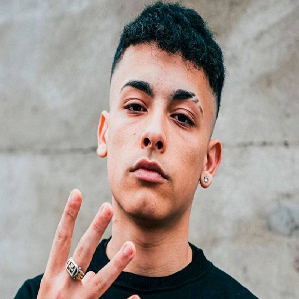

In [ ]:
trueno = image.load_img("trueno-w.jpg", target_size=input_shape)
trueno


In [ ]:
x = image.img_to_array(trueno)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features_trueno = model.predict(x)


In [ ]:
print(cosine_similarity(features_trueno, features))

[[0.5893412  0.58516675 0.5467843 ]]


In [ ]:
img_labels = []
img_paths = []
for (dirpath, dirnames, filenames) in os.walk("lfw-deepfunneled"):
    for file_name in filenames:
        # Get full path to the file
        file_full_path = os.path.join(dirpath, file_name)
        img_paths.append(file_full_path)

        # Get person name for the given image
        name = " ".join(file_name.split("_")[:-1])
        img_labels.append(name)


batch_size = 128
img_features = []
for i in tqdm(range(0, len(img_paths), batch_size)):
    batch_paths = img_paths[i:i + batch_size]
    batch_imgs = [
        image.load_img(img_path, target_size=input_shape)
        for img_path in batch_paths
    ]
    x = np.array([image.img_to_array(img) for img in batch_imgs])
    x = preprocess_input(x)

    batch_features = model.predict(x, batch_size=batch_size)
    img_features.extend(list(batch_features))

img_features = np.asarray(img_features)
img_labels = np.asarray(img_labels)
img_paths = np.asarray(img_paths)

img_features.shape, img_labels.shape, img_paths.shape

  0%|          | 0/104 [00:00<?, ?it/s]

((13233, 2048), (13233,), (13233,))

In [ ]:
%%time
sim = cosine_similarity(features_trueno, img_features)[0]
sim_argsort = np.argsort(sim)[::-1]


CPU times: user 127 ms, sys: 10.1 ms, total: 137 ms
Wall time: 121 ms


In [ ]:
for i in range(5):
    label = img_labels[sim_argsort[i]]
    similarity = sim[sim_argsort[i]]
    print(f"- Matched subject '{label}' with similarity {similarity:.4f}")


- Matched subject 'Robert Gallo' with similarity 0.7333
- Matched subject 'Alexandra Rozovskaya' with similarity 0.7292
- Matched subject 'Winona Ryder' with similarity 0.7245
- Matched subject 'Brad Miller' with similarity 0.7243
- Matched subject 'Jennifer Lopez' with similarity 0.7178


In [ ]:
!wget -O "george.jpeg" "https://cloudfront-us-east-1.images.arcpublishing.com/infobae/XW4S75Y7IBECTEY25SZYHZU76A.jpeg"

--2022-09-16 21:17:32--  https://cloudfront-us-east-1.images.arcpublishing.com/infobae/XW4S75Y7IBECTEY25SZYHZU76A.jpeg
Resolving cloudfront-us-east-1.images.arcpublishing.com (cloudfront-us-east-1.images.arcpublishing.com)... 18.67.76.21, 18.67.76.70, 18.67.76.29, ...
Connecting to cloudfront-us-east-1.images.arcpublishing.com (cloudfront-us-east-1.images.arcpublishing.com)|18.67.76.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 698750 (682K) [image/jpeg]
Saving to: ‘george.jpeg’

george.jpeg         100%[===================>] 682.37K  --.-KB/s    in 0.03s   

2022-09-16 21:17:32 (23.2 MB/s) - ‘george.jpeg’ saved [698750/698750]



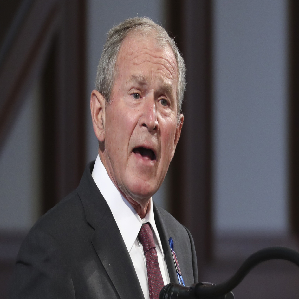

In [ ]:
george = image.load_img("george.jpeg", target_size=input_shape)
george

In [ ]:
x = image.img_to_array(george)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features_george = model.predict(x)


In [ ]:
%%time
sim = cosine_similarity(features_george, img_features)[0]
sim_argsort = np.argsort(sim)[::-1]


CPU times: user 122 ms, sys: 17.1 ms, total: 139 ms
Wall time: 129 ms


In [ ]:
for i in range(10):
    label = img_labels[sim_argsort[i]]
    similarity = sim[sim_argsort[i]]
    print(f"- Matched subject '{label}' with similarity {similarity:.4f}")


- Matched subject 'Goran Persson' with similarity 0.8300
- Matched subject 'Martin Frost' with similarity 0.8297
- Matched subject 'Spike Helmick' with similarity 0.8275
- Matched subject 'Sean OKeefe' with similarity 0.8223
- Matched subject 'George W Bush' with similarity 0.8221
- Matched subject 'George W Bush' with similarity 0.8182
- Matched subject 'Donald Rumsfeld' with similarity 0.8178
- Matched subject 'George W Bush' with similarity 0.8166
- Matched subject 'George W Bush' with similarity 0.8158
- Matched subject 'Frank Dunham Jr' with similarity 0.8157
